# Lab - 1: Activation Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def relu(x):
  return np.maximum(0,x)

def binary_step(x):
  return np.heaviside(x, 0)

def sigmoid(x):
  return 1/(1+np.exp(-x))

def leaky_relu(x, alpha = 0.1):
  return np.maximum(alpha*x, x)

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

def tanh(x):
  return np.tanh(x)

In [18]:
def plot(func):
  x = np.linspace(-10,10,100)
  y = func(x)
  plt.plot(x,y)
  plt.show()

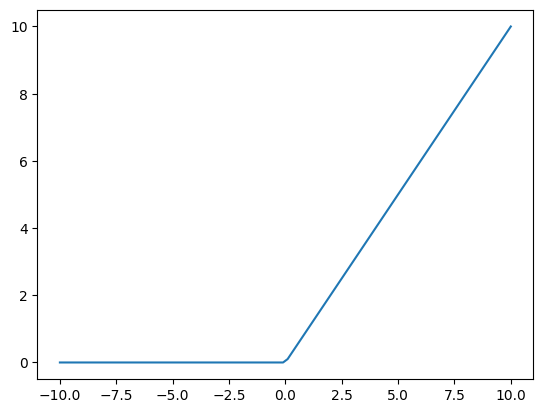

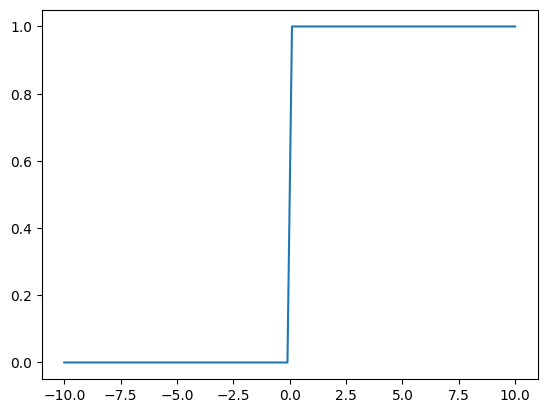

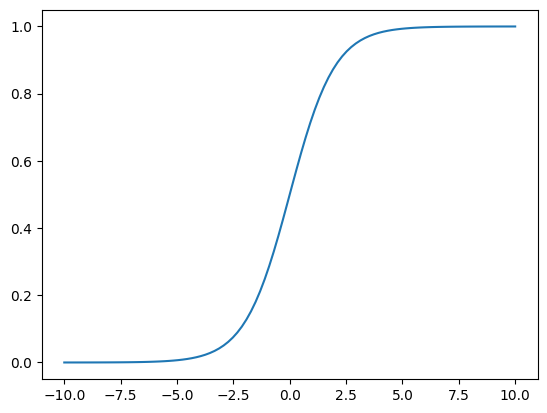

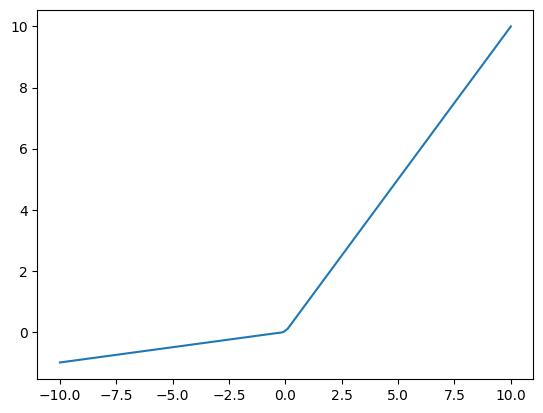

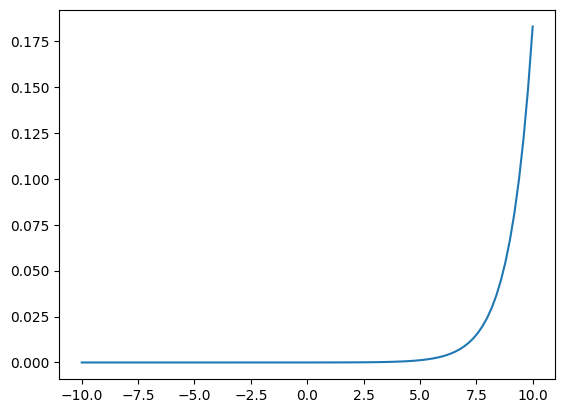

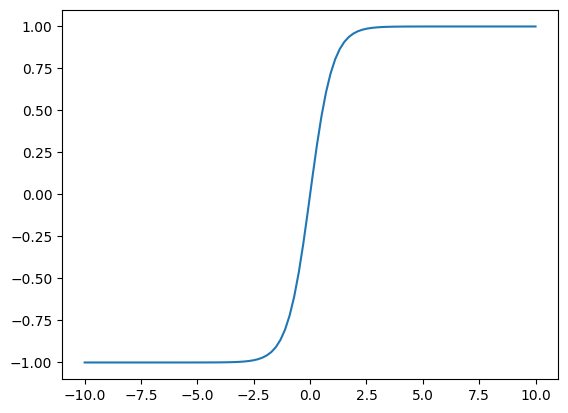

In [19]:
plot(relu)
print()
plot(binary_step)
print()
plot(sigmoid)
print()
plot(leaky_relu)
print()
plot(softmax)
print()
plot(tanh)

# Lab - 2

## Error Correction

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
class Neuron:
  def __init__(self, n_inputs):
    self.w = np.random.rand(n_inputs)
    self.b = np.random.rand()

  def forward(self, x):
    return self.sigmoid((self.w @ x) + self.b)

  def sigmoid(self, x):
    return 1/(1+np.exp(-x))

  def train(self, inputs, target, lr = 0.01, epochs = 50):
    errors = []
    for i in range(epochs):
      out = self.forward(inputs)
      error = target - out
      errors.append(np.sum(error))
      self.w += lr * error * inputs
      self.b += lr * error
    plt.plot(errors)
    plt.show()
    print()
    print(f"Predicted Outputs: {self.forward(inputs)}")
    print(f"Actual Outputs: {target}")

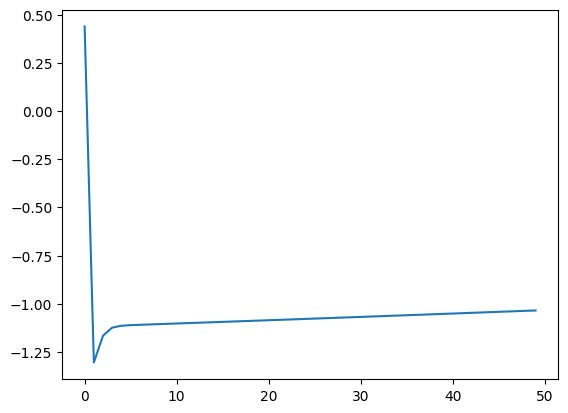


Predicted Outputs: [0.76074062 0.83730024 0.83730024 0.83730024 0.76074062]
Actual Outputs: [0 1 1 1 0]


In [33]:
inputs = np.array([-10, 10, 15, 12, -0.5])
target = np.array([0, 1, 1, 1, 0])

neuron = Neuron(5)
neuron.train(inputs, target)

## Memory Based Learning

In [35]:
import numpy
from collections import Counter

In [36]:
class Neuron:
  def __init__(self, k):
    self.k = k
    self.X_train = None
    self.y_train = None

  def train(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def distance(self, x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

  def predictions(self, X_test):
    preds = [self.predict(X) for X in X_test]
    return np.array(preds)

  def predict(self, x):
    distances = [self.distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nn = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nn).most_common(1)
    return most_common[0][0]

In [39]:
neuron = Neuron(6)
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [7, 8]])
y_train = np.array([0, 0, 0, 1, 1, 1])
neuron.train(X_train, y_train)
preds = neuron.predictions(np.array([[2, 3], [6, 7]]))
preds

array([0, 1])

## Hebbian Learning

In [40]:
import numpy as np

In [41]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = np.random.rand(n_inputs)

  def activate(self, x):
    return self.weights @ x

  def learn_hebbian(self, inputs, lr = 0.01, epochs = 1000):
    for i in range(epochs):
      activated = self.activate(inputs)
      self.weights += lr * activated * inputs

In [43]:
neuron = Neuron(4)
inputs = np.array([0.05, 0.3, 1.5, 6.9])
neuron.learn_hebbian(inputs)
print(neuron.weights)

[4.87495932e+173 2.92497559e+174 1.46248780e+175 6.72744386e+175]


# Lab - 3

## Linear Gate Operations using Perceptron

In [44]:
from sklearn.linear_model import Perceptron

In [46]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_nor = np.array([1, 0, 0, 0])
y_nand = np.array([1, 1, 1, 0])

perceptron = Perceptron()

In [47]:
def train_and_test(X, y, gate_name):
    perceptron.fit(X, y)
    predictions = perceptron.predict(X)
    print(f"\n{gate_name} Gate:")
    for inp, pred in zip(X, predictions):
        print(f"{inp[0]} {gate_name} {inp[1]} = {pred}")

In [48]:
train_and_test(X, y_and, "AND")
train_and_test(X, y_or, "OR")
train_and_test(X, y_nor, "NOR")
train_and_test(X, y_nand, "NAND")


AND Gate:
0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1

OR Gate:
0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1

NOR Gate:
0 NOR 0 = 1
0 NOR 1 = 0
1 NOR 0 = 0
1 NOR 1 = 0

NAND Gate:
0 NAND 0 = 1
0 NAND 1 = 0
1 NAND 0 = 0
1 NAND 1 = 0


## XOR Gate using MLP

In [56]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

In [57]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
errors = []

In [65]:
for lr in learning_rates:
    model = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', learning_rate_init=lr, max_iter=50000, random_state=42)
    model.fit(X, y)
    predictions = model.predict(X)
    error = mean_squared_error(y, predictions)
    errors.append(error)
    print(f"\nLearning Rate = {lr}")
    for i, (inp, pred) in enumerate(zip(X, predictions)):
        print(f"{X[i][0]} XOR {X[i][1]} = {pred}")
    print(f"Training Error: {error:.4f}")


Learning Rate = 0.001
0 XOR 0 = 1
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 1
Training Error: 0.5000

Learning Rate = 0.01
0 XOR 0 = 0
0 XOR 1 = 0
1 XOR 0 = 1
1 XOR 1 = 0
Training Error: 0.2500

Learning Rate = 0.1
0 XOR 0 = 0
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 0
Training Error: 0.0000

Learning Rate = 0.5
0 XOR 0 = 0
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 1
Training Error: 0.2500

Learning Rate = 1.0
0 XOR 0 = 0
0 XOR 1 = 0
1 XOR 0 = 0
1 XOR 1 = 0
Training Error: 0.5000


# Lab - 4: XOR Using RBF

In [68]:
import numpy as np
import matplotlib.pyplot as plt
inputs = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
outputs = np.array([0, 0, 1, 1])

In [69]:
def gaussian(x, c):
    return np.exp(-np.linalg.norm((x-c)**2))

In [70]:
w1 = np.array([1, 1])
w2 = np.array([0, 0])
f1 = []
f2 = []

In [71]:
for i in inputs:
    v1, v2 = gaussian(i, w1), gaussian(i, w2)
    f1.append(v1), f2.append(v2)

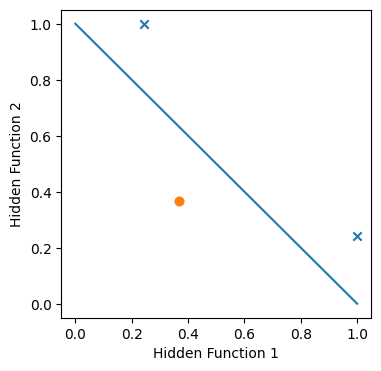

In [73]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(f1[:2], f2[:2], marker = 'x')
ax.scatter(f1[2:], f2[2:], marker = 'o')
plt.xlabel('Hidden Function 1')
plt.ylabel('Hidden Function 2')
x = np.linspace(0, 1, 10)
y = -x+1
ax.plot(x, y, label='y = -x + 1')
plt.show()

# Lab - 5: Hebbian PCA

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [75]:
class Neuron:
    def __init__(self, features, lr):
        self.lr = lr
        self.weights = np.random.rand(features)

    def activate(self, inputs):
        return np.dot(inputs, self.weights)

    def hebbian_learn(self, inputs, epochs = 100):
        for _ in range(epochs):
            for p in inputs:
                self.weights += self.lr * self.activate(p) * p
            norm = np.linalg.norm(self.weights)
            if norm > 0:
                self.weights /= norm

In [76]:
x = np.random.randint(0, 100, 1000)
noise = np.random.normal(2, 50, size = x.shape)
y = 3 * x + 2 + noise
inputs = np.column_stack((x, y))

In [77]:
mean = np.mean(inputs, axis = 0)
center = inputs - mean

In [78]:
neuron = Neuron(2, 0.00001)
neuron.hebbian_learn(center)
w = neuron.weights * 500

In [79]:
pca = PCA(n_components = 1)
pca.fit_transform(center)
origin = np.array([0, 0])

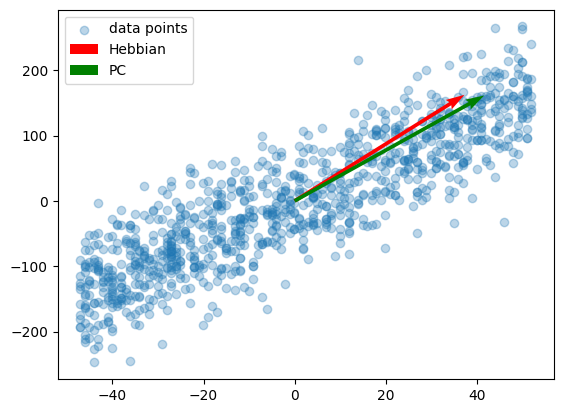

In [80]:
plt.scatter(center[:, 0], center[:, 1], alpha = 0.3, label = 'data points')
plt.quiver(*origin, *w, color = 'r', scale = 3, scale_units = 'xy', angles = 'xy', label = 'Hebbian')
plt.quiver(*origin, *pca.components_[0] * 500, color = 'g', scale = 3, scale_units = 'xy', angles = 'xy', label = 'PC')
plt.legend()
plt.show()

# Lab - 6

## Self-Organizing Maps

In [82]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=1136b4e207375b39a86f03975880fd422e864e32bf3e306b77bee9995a4edaab
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

In [87]:
data = np.random.rand(100, 3)
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, num_iteration=1000)

In [88]:
color_map = np.zeros((10, 10, 3))
for i in range(10):
    for j in range(10):
        color_map[i, j] = som.get_weights()[i, j]

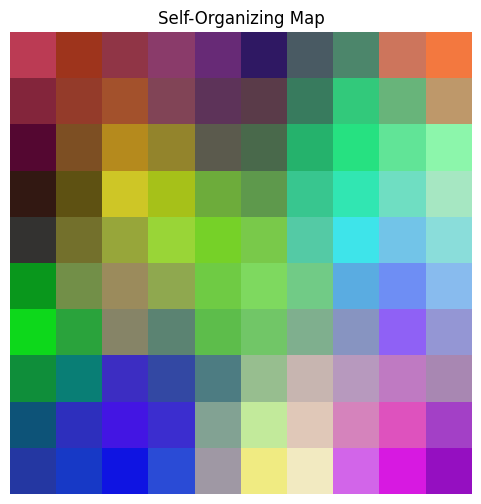

In [89]:
plt.figure(figsize=(6, 6))
plt.imshow(color_map, origin='upper')
plt.title("Self-Organizing Map")
plt.axis('off')
plt.show()

## Backprogation in RNN

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [91]:
sequence_data = np.random.rand(10, 5, 3).astype(np.float32)
target_data = np.random.rand(10, 2).astype(np.float32)

X = torch.tensor(sequence_data)
y = torch.tensor(target_data)

In [92]:
class TemporalRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TemporalRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        last_hidden = out[:, -1, :]
        out = self.fc(last_hidden)
        return out

In [93]:
model = TemporalRNN(input_size=3, hidden_size=8, output_size=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [94]:
for epoch in range(100):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.1135
Epoch 10, Loss: 0.0439
Epoch 20, Loss: 0.0289
Epoch 30, Loss: 0.0225
Epoch 40, Loss: 0.0172
Epoch 50, Loss: 0.0132
Epoch 60, Loss: 0.0096
Epoch 70, Loss: 0.0065
Epoch 80, Loss: 0.0039
Epoch 90, Loss: 0.0019


# Lab - 7: Hopfield Networks

In [109]:
import numpy as np

In [110]:
def train_hopfield(patterns):
  num_neurons = len(patterns[0])
  weights = np.zeros((num_neurons, num_neurons))

  for pattern in patterns:
    pattern = np.array(pattern).reshape(-1, 1)
    weights += pattern @ pattern.T

  np.fill_diagonal(weights, 0)
  return weights

In [111]:
def recall(weights, input, max_iter = 10):
  output = np.array(input)

  for _ in range(max_iter):
    for i in range(len(output)):
      net_input = weights[i] @ output
      output[i] = 1 if net_input >= 0 else -1

  return output

In [113]:
original = [-1, 1, -1, -1, -1, -1, -1, 1, -1, 1]
weights = train_hopfield([original])
noisy = [-1, -1, -1, 1, -1, -1, -1, 1, -1, 1]
recalled = recall(weights, noisy)
print(recalled)

[-1  1 -1 -1 -1 -1 -1  1 -1  1]


# Lab - 10: Optimizers

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad, RMSprop, Adam

In [119]:
X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [121]:
def build_model(opt):
    model = Sequential([
        Dense(10, activation='relu', input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


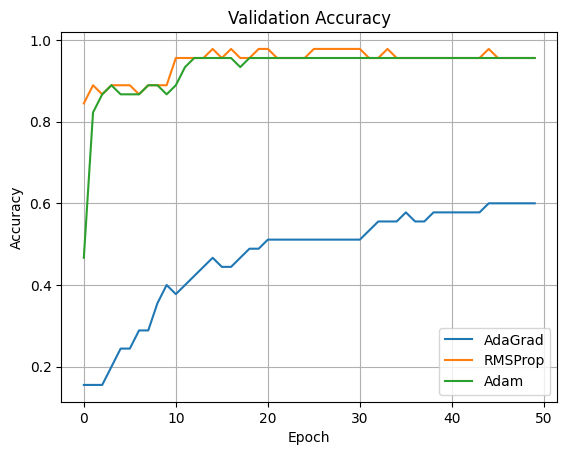

In [122]:
opts = {'AdaGrad': Adagrad(0.01), 'RMSProp': RMSprop(0.01), 'Adam': Adam(0.01)}
histories = {name: build_model(opt).fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))
             for name, opt in opts.items()}

for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=name)
plt.title("Validation Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.grid(True); plt.show()

# Lab - 11: CNN Architectures

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load & preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN Architectures
def LeNet():
    model = models.Sequential([
        layers.Conv2D(6, 5, activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, 5, activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def AlexNet():
    model = models.Sequential([
        layers.Conv2D(64, 3, activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.MaxPool2D(),
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(256, 3, activation='relu'),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def VGG_Like():
    model = models.Sequential([
        layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPool2D(),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.Conv2D(128, 3, activation='relu', padding='same'),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def PlacesNet_Like():
    model = models.Sequential([
        layers.Conv2D(32, 5, activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPool2D(),
        layers.Conv2D(64, 5, activation='relu'),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Train models and collect histories
architectures = {'LeNet': LeNet, 'AlexNet': AlexNet, 'VGG': VGG_Like, 'PlacesNet': PlacesNet_Like}
histories = {}

for name, builder in architectures.items():
    print(f"Training {name}...")
    model = builder()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=0)
    histories[name] = history

# Plot validation accuracy
plt.figure(figsize=(10, 6))
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=name)
plt.title("Validation Accuracy Comparison on MNIST")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend(); plt.grid(True); plt.show()

Training LeNet...
Training AlexNet...


KeyboardInterrupt: 

# Lab 12

## Single Step of RNN

In [132]:
import numpy as np

# Input size, hidden size
input_size = 4
hidden_size = 3

# Random weights
Wx = np.random.randn(hidden_size, input_size)   # Input to hidden
Wh = np.random.randn(hidden_size, hidden_size)  # Hidden to hidden
b = np.random.randn(hidden_size, 1)             # Bias

# Sample input (xt) and previous hidden state (ht-1)
xt = np.random.randn(input_size, 1)             # shape (input_size, 1)
ht_prev = np.random.randn(hidden_size, 1)       # shape (hidden_size, 1)

# Single forward step of RNN cell
ht = np.tanh(np.dot(Wx, xt) + np.dot(Wh, ht_prev) + b)

print("New hidden state (ht):\n", ht)

New hidden state (ht):
 [[ 0.97845832]
 [-0.23228078]
 [-0.99658564]]


## Forward Pass of RNN

In [130]:
import tensorflow as tf
import numpy as np

# Define input size, hidden size, and sequence length
input_size = 4
hidden_size = 3
sequence_length = 5  # Length of the sequence

# Create a SimpleRNN cell
rnn_cell = tf.keras.layers.SimpleRNNCell(hidden_size)

# Random input sequence (sequence_length x input_size)
input_sequence = np.random.randn(sequence_length, input_size).astype(np.float32)

# Initialize hidden state
h = np.zeros((hidden_size,), dtype=np.float32)

# Perform forward propagation for each time step
for t in range(sequence_length):
    xt = input_sequence[t]  # Input at time step t
    h, _ = rnn_cell(xt, states=[h])  # Compute the new hidden state

    print(f"Hidden state at time step {t}: {h}")

Hidden state at time step 0: [ 0.9805022  -0.7410478   0.88423705]
Hidden state at time step 1: [ 0.95730186 -0.9507282   0.9988288 ]
Hidden state at time step 2: [-0.86425626 -0.41467974  0.8581707 ]
Hidden state at time step 3: [ 0.19020665 -0.98848706 -0.60021406]
Hidden state at time step 4: [-0.48223513  0.83732605  0.23146614]


## LSTM

In [131]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM

# Sample data (sequence_length, input_size)
X = np.random.randn(5, 10)  # Input sequence with 5 time steps and 10 features

# Define LSTM layer in Keras
input_size = 10
hidden_size = 4  # Number of LSTM units
lstm_layer = LSTM(hidden_size, return_sequences=True, return_state=True)

# Initialize input as a batch of 1 (e.g., 1 sequence)
X_input = np.expand_dims(X, axis=0)  # Shape: (1, sequence_length, input_size)

# Forward pass through LSTM
output, state_h, state_c = lstm_layer(X_input)

print("Output shape (hidden states at each time step):", output.shape)  # (batch_size, sequence_length, hidden_size)
print("Final hidden state:", state_h.shape)  # (batch_size, hidden_size)
print("Final cell state:", state_c.shape)  # (batch_size, hidden_size)


Output shape (hidden states at each time step): (1, 5, 4)
Final hidden state: (1, 4)
Final cell state: (1, 4)
